# NABS Density plot

## System
Density relaxation for a time peroid of 1ns.

System: Al0, Al1, Al2.5, Al5, Al7.5, Al10, Al12.5, Al15, Al17.5, Al20.


In [48]:
!echo "hello python"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
font = {'family' : 'CMU Serif',
        'weight' : 'bold',
        'size'   : 20}

matplotlib.rc('font', **font)

plt.rc('text', usetex=True)
plt.rc('font', family='CMU Serif',)

matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']


import sys
sys.path.append("/Users/rajesh/work/github/python_packages")
from lmps.log import reader

markers = ['.','o','*','s']
color = ['k','r','b','g']

hello python


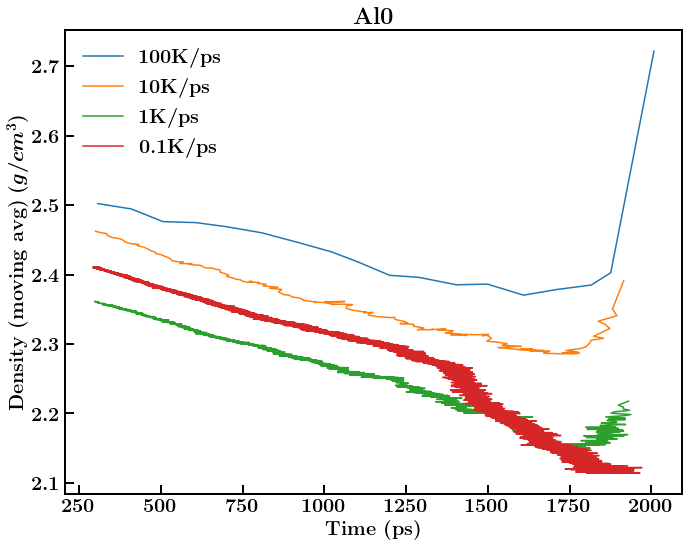

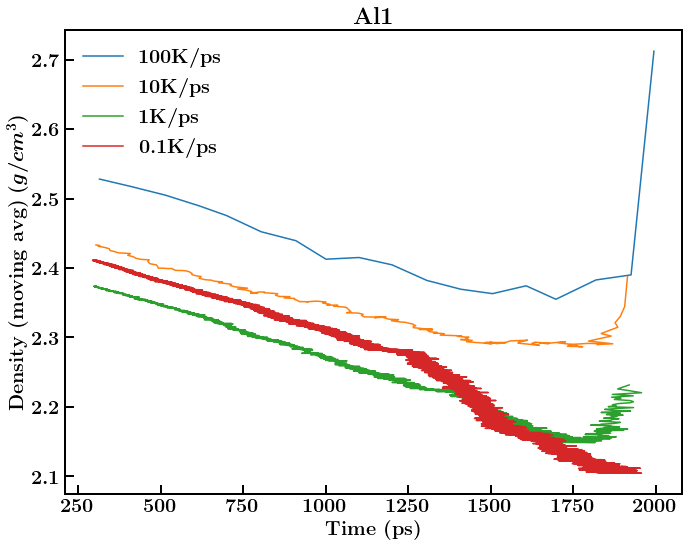

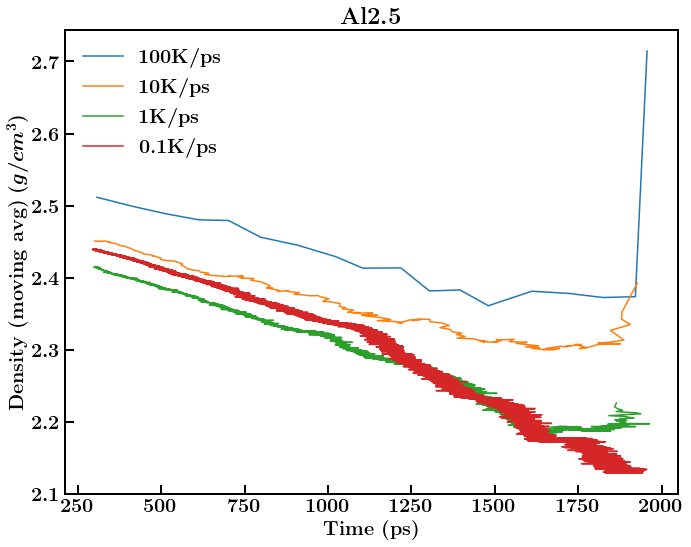

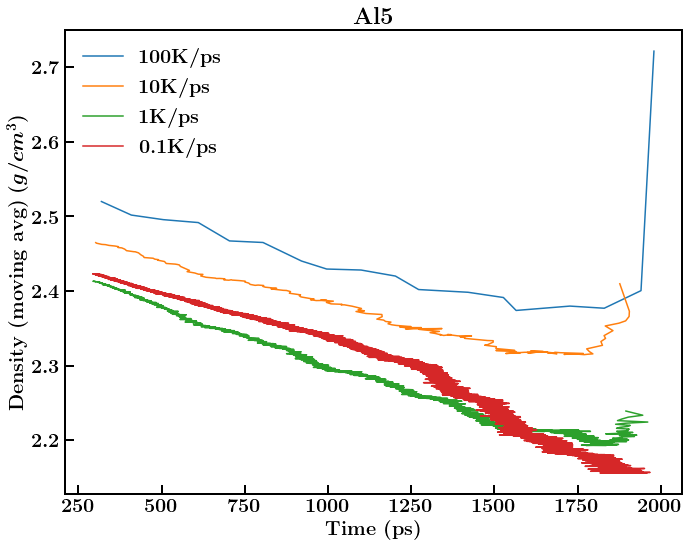

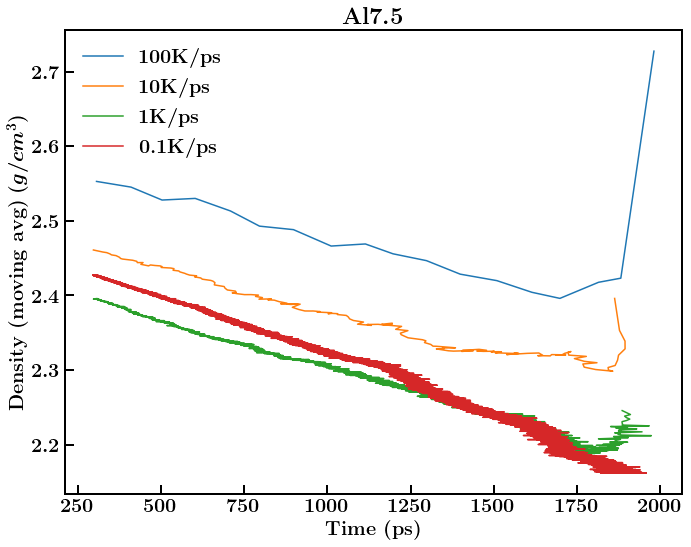

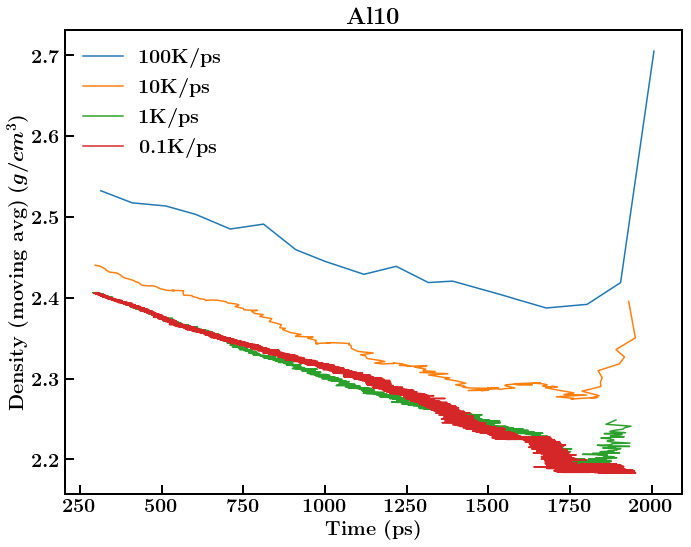

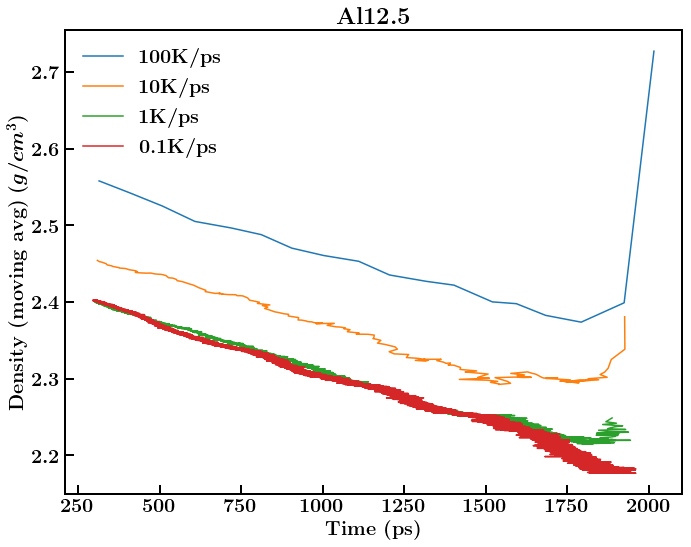

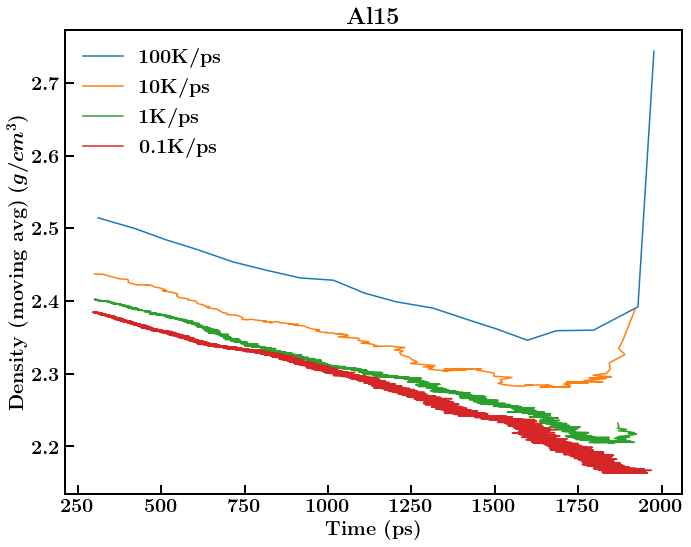

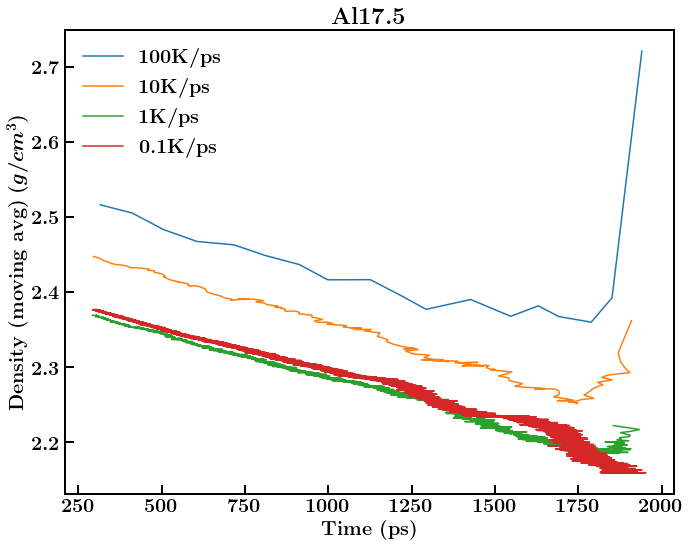

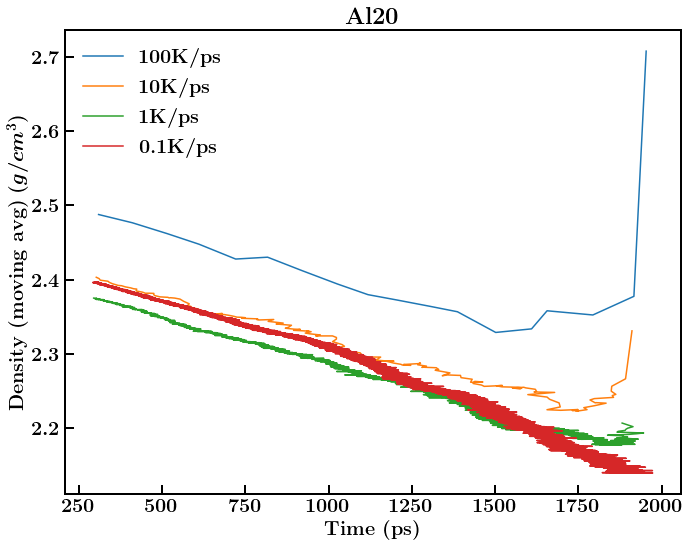

In [49]:
cooling_rate = [10,1,0.1,100]
a=['al0','al1','al2.5','al5','al7.5','al10','al12.5','al15','al17.5','al20']
seq = [4,1,2,3]

for j in range(10):
    fig,(ax) = plt.subplots(1, 1, figsize=(10, 8), tight_layout=True)
    ax.clear()

    for i in range(4):
        
        foldername = '/Users/rajesh/work/simulations/cool/cool'+str(j+1)+'_'+str(seq[i])+'/'
        filename = foldername + 'log.lammps'
        tables = reader(filename)
        df = tables['df'][2]
        density = df['Density'].values
        df.to_csv(foldername+'data.csv')
        ax.plot(df['Temp'], df['Density'].rolling(window=int(100/cooling_rate[seq[i]-1])).mean(), label=r'\textbf{{{}}}'.format(str(cooling_rate[seq[i]-1])+'K/ps'))
        
    ax.set_title(r'\textbf{{{}}}'.format(a[j].title()))
    ax.set_xlabel(r'\textbf{Time (ps)}')
    ax.set_ylabel(r'\textbf{Density (moving avg)} $(g/cm^3)$')
    #ax.set_ylim([2.35,2.65])
    ax.legend(loc='upper right')  #,bbox_to_anchor=(1,1),)
    plt.legend(frameon=False)
    ax.tick_params(direction='in', length=9, width=2, colors='k',
               grid_color='k', grid_alpha=0.5, )
    
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    
    fig.savefig(a[j]+'.png',format=None,dpi=300,bbox_inches="tight")
    fig.show() 

In [38]:
tables['label']

['Active Fix:\nall npt temp 3000 3000 100 iso 0 0 1000',
 'Active Fix:\nall npt temp 3000 2000 100 iso 49346.2 49346.2 1000',
 'Active Fix:\nall npt temp 2000 300 100 iso 0 0 1000',
 'Active Fix:\nall npt temp 300 300 100 iso 0.0 0.0 1000',
 'Active Fix:\nall print 1000 "${p1} ${p2} ${p2} ${p4} ${p5}" append ../cool.txt screen no\nall nvt temp 300 300 100']